Определение зависимости $\theta$ вида

$ \Delta \theta - \Delta \theta* = ( a + b \sigma_2 ) (\Delta \varepsilon_1 - \Delta \varepsilon_1^*)$ &emsp; (1)

$ \Delta \theta = ( a + b \sigma_2 ) (\Delta \varepsilon_1 - \Delta \varepsilon_1^*) + \Delta \theta*$ &emsp; (1.1)

$ \Delta \theta * = \varepsilon1 - 2 \varepsilon_2 $  (см. график)

Формула из статьи:

$\Delta \theta = ( 1 - c_1 - 2 c_2 \sigma_2 ) (\Delta \varepsilon_1 - \Delta \varepsilon_1^*)$ &emsp; (2)

Она плохо обоснована (в части коэффициентов, поэтому их нужно определить точнее)


$\Delta \theta = ( 1 - c_1 - 2 c_2 \sigma_2 ) (\Delta \varepsilon_1 - \Delta \varepsilon_1^*)$ &emsp; (2)

Данные: Статья ставрогина: ПРОЧНОСТЬ И ДЕФОРМАЦИЯ ГОРНЫХ ПОРОД В ДОПРЕДЕЛЬНОЙ И ЗАПРЕДЕЛЬНОЙ ОБЛАСТЯХ

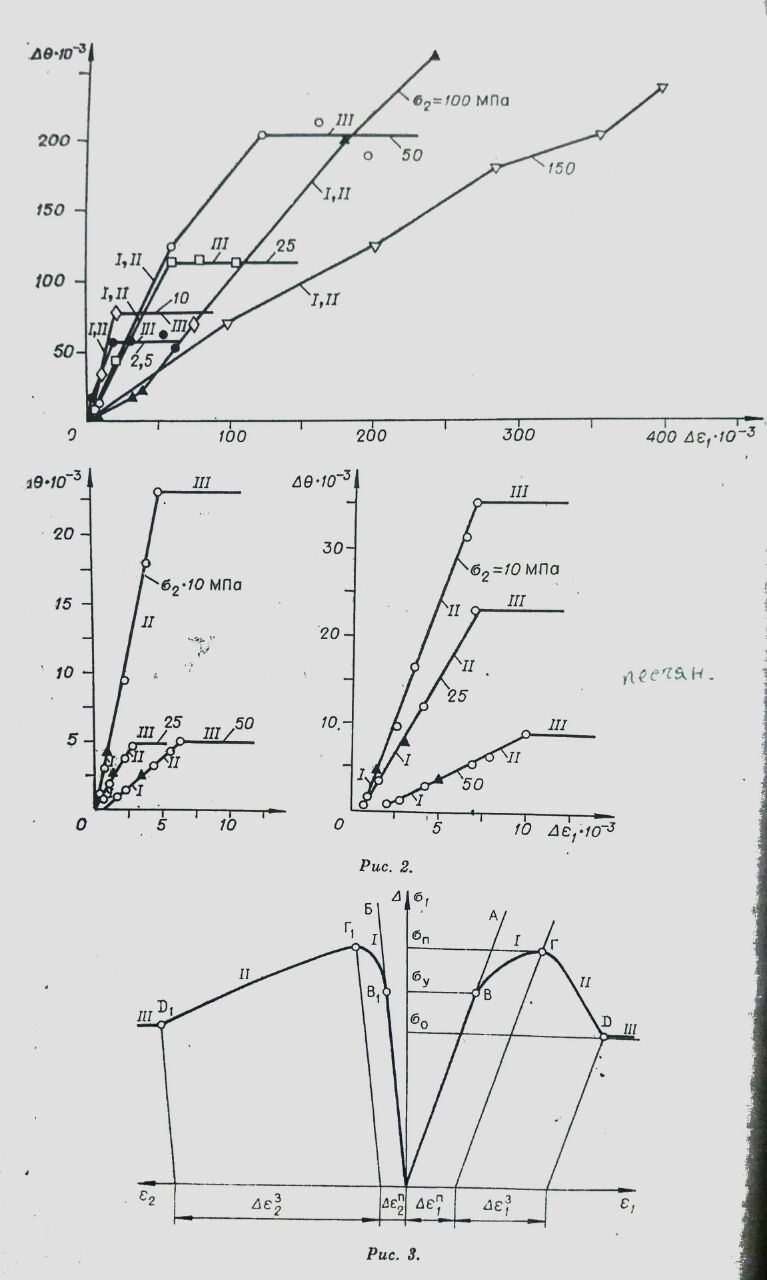

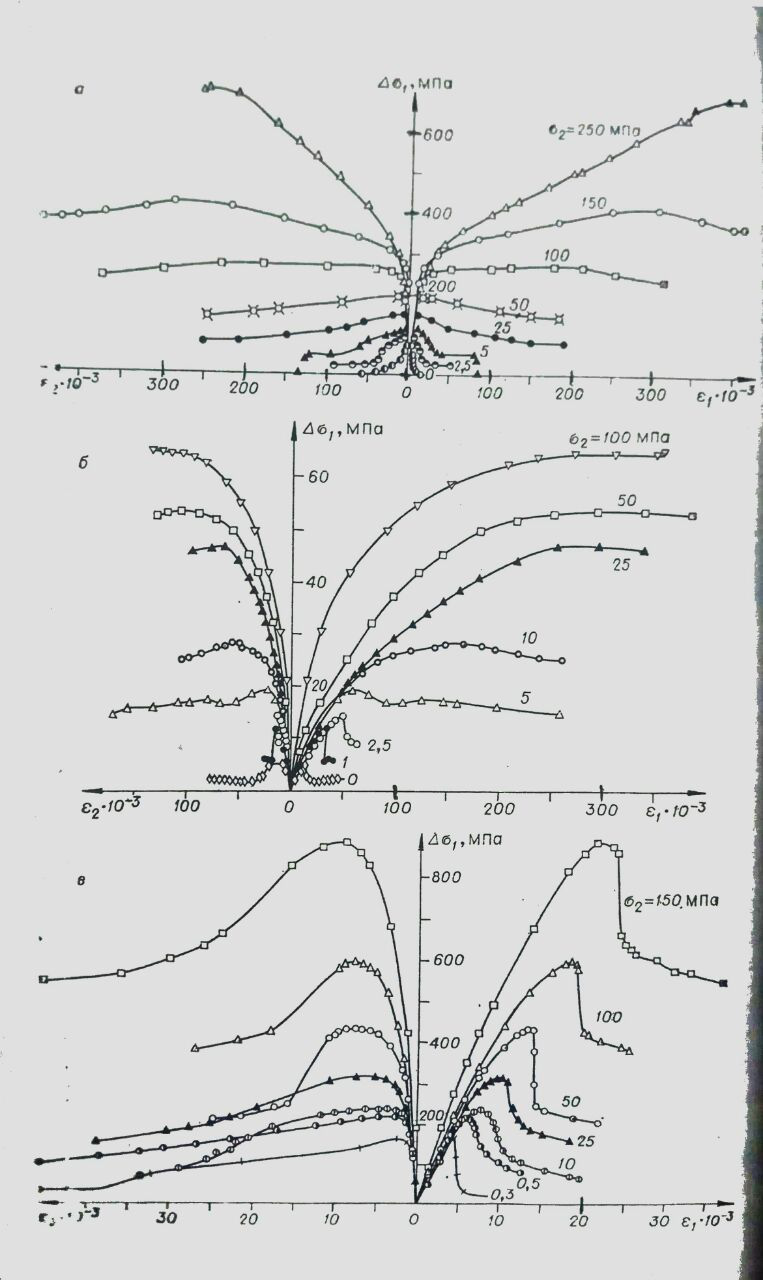

Программа для перевода графиков в табличный вид
https://github.com/markummitchell/engauge-digitizer/releases/tag/v12

- выбрать систему координат
- смотреть точки водя курсором
- выделять кривые и экспортировать в csv

In [52]:
# подключение модулей
import pandas as pd
import numpy as np
from scipy.optimize import *
from scipy.stats import linregress
from scipy.stats import pearsonr
from matplotlib.pyplot import *
import seaborn

- Две точки для каждого $\sigma_2$
- данные из графиков для Мрамора
- Большие значения $\sigma_2$ игнорируем: 100, 150 МПа иначе функция $\Delta \theta = f(\sigma_2)$ получается нелинейной
- $\Delta \theta *$ определяется по графику, а не чрезе разность деформаций. Иначе получается фигня.
- фигня получается из-за того, что на графиках разные величины на оси абсцисс: $\varepsilon_1$ и $\Delta \varepsilon_1$

### вариант данных БЕЗ больших значений $\sigma_2$.  
- использовать его

In [100]:
# рассмотрим несколько значений sigma_2. это подпись к кривой
ss2 =   np.array([50,  25,  2.5,    50,  25,  2.5])              # вторая картинка, первый график
n = len(ss2)
# для удобства epsillon1 менять не будем
ee1  =   np.array([50, 50,  50,     30,  30,  30 ] )/1000         # вторая картинка, первый график
ee2  =   np.array([86, 79,  51,     55,  45,  21 ] )/1000         # вторая картинка, первый график
# далее смотрим соответствующие 50 значения Theta
TT =    np.array([107,  97,  50,    66,  57,  56 ]) / 1000       # первая картинка, первый график. 
# для sigma2=2.5, Theta достигла предельного значения

# не нужны. получаются отрицательные значения у Theta, если использовать
ee1_z = np.array( [14,  10,    8]*2 )/1000    # вторая картинка, первый график. абсцисса где график перестаёт быть прямым
ee2_z = np.array( [14,   6,    0]*2 )/1000               

TTz =    np.array([19,  19,  30,    19,  19,  30]) / 1000       # первая картинка, первый график. 
TTz_2 =  2*ee2_z - ee1_z

# второй способ вычисления TT, по первому графику (sigma1-ee1)
TT_2 = 2*ee2 - ee1


# запишем данные в таблицу
data = pd.DataFrame({"sigma2": ss2, "theta":TT, "theta_2":TT_2, "eps1": ee1, "eps2": ee2,
                     "eps1z": ee1_z, "eps2z": ee2_z, "thetaz":TTz, "thetaz_2":TTz_2, "kind": ["мрамор"]*len(ss2) })

# data.loc[data.thetaz_2 < 0, 'thetaz_2'] = 0

# напечатаем таблицу
data

,sigma2,theta,theta_2,eps1,eps2,eps1z,eps2z,thetaz,thetaz_2,kind
0,50.0,0.107,0.122,0.05,0.086,0.014,0.014,0.019,0.014,мрамор
1,25.0,0.097,0.108,0.05,0.079,0.010,0.006,0.019,0.002,мрамор
2,2.5,0.050,0.052,0.05,0.051,0.008,0.000,0.030,-0.008,мрамор
3,50.0,0.066,0.080,0.03,0.055,0.014,0.014,0.019,0.014,мрамор
4,25.0,0.057,0.060,0.03,0.045,0.010,0.006,0.019,0.002,мрамор
5,2.5,0.056,0.012,0.03,0.021,0.008,0.000,0.030,-0.008,мрамор


из формулы (1.1) выразим такую левую часть, так чтобы в правой части осталось линейное относительно $\sigma_2$ выражение:

$  \frac{ \Delta \theta - \Delta \theta* } {(\Delta \varepsilon_1 - \Delta \varepsilon_1^*)} = a + b \sigma_2 $ &emsp; (3)

Обозначим левую часть как:
$ F1 = \frac{ \Delta \theta - \Delta \theta* } {(\Delta \varepsilon_1 - \Delta \varepsilon_1^*)} $


In [101]:
F1 =   (TT   - TTz  ) / (ee1 - ee1_z)
F1_2 = (TT_2 - TTz_2) / (ee1 - ee1_z)

# data = pd.DataFrame({"sigma2": ss2, "theta":TT, "eps1": ee1, 
#                      "eps1z": ee1_z, "thetaz":TTz, "theta_1":TT1, "kind": ["мрамор"]*len(ss2) })

data['F1'] = F1
data['F1_2'] = F1_2
data

,sigma2,theta,theta_2,eps1,eps2,eps1z,eps2z,thetaz,thetaz_2,kind,F1,F1_2
0,50.0,0.107,0.122,0.05,0.086,0.014,0.014,0.019,0.014,мрамор,2.444444,3.000000
1,25.0,0.097,0.108,0.05,0.079,0.010,0.006,0.019,0.002,мрамор,1.950000,2.650000
2,2.5,0.050,0.052,0.05,0.051,0.008,0.000,0.030,-0.008,мрамор,0.476190,1.428571
3,50.0,0.066,0.080,0.03,0.055,0.014,0.014,0.019,0.014,мрамор,2.937500,4.125000
4,25.0,0.057,0.060,0.03,0.045,0.010,0.006,0.019,0.002,мрамор,1.900000,2.900000
5,2.5,0.056,0.012,0.03,0.021,0.008,0.000,0.030,-0.008,мрамор,1.181818,0.909091


### вариант данных для больших значений $\sigma_2$.  
- он не работает
- проверить с новым способом вычисления _2 ?

In [55]:
# данные из графиков для Мрамора

# рассмотрим несколько значений sigma_2. это подпись к кривой
ss2 =   np.array([150,  100, 50,  25,  2.5,    150,    50,  25,  2.5])              # вторая картинка, первый график
n = len(ss2)
# для удобства epsillon1 менять не будем
ee1  =  np.array([350,  240,  50,  50,  50,    340,    30,  30,  30 ]) / 1000       # вторая картинка, первый график
# далее смотрим соответствующие 50 значения Theta
TT =    np.array([203,   258, 107,  97,  50,   197,    66,  57,  56 ]) / 1000       # первая картинка, первый график. 
# для sigma2=2.5, Theta достигла предельного значения

ee1_z = np.array( [300, 200, 14,  10,    8,    300,    14,  10,   8 ]) / 1000    # вторая картинка, первый график. абсцисса где график перестаёт быть прямым
# ee2_z = np.array( [14,   6,    0]*2 )/1000               

TTz =    np.array([123, 219, 28,  28,  44,     123,    28,  28,  44]) / 1000       # первая картинка, первый график. 
# TTz =  2*ee2_z - ee1_z


# запишем данные в таблицу
data2 = pd.DataFrame({"sigma2": ss2, "theta":TT, "eps1": ee1, 
                     "eps1z": ee1_z, "thetaz":TTz, "kind": ["мрамор"]*len(ss2) })

# напечатаем таблицу
data2

,sigma2,theta,eps1,eps1z,thetaz,kind
0,150.0,0.203,0.35,0.300,0.123,мрамор
1,100.0,0.258,0.24,0.200,0.219,мрамор
2,50.0,0.107,0.05,0.014,0.028,мрамор
3,25.0,0.097,0.05,0.010,0.028,мрамор
4,2.5,0.050,0.05,0.008,0.044,мрамор
5,150.0,0.197,0.34,0.300,0.123,мрамор
6,50.0,0.066,0.03,0.014,0.028,мрамор
7,25.0,0.057,0.03,0.010,0.028,мрамор
8,2.5,0.056,0.03,0.008,0.044,мрамор


#### Определим коэффициенты уравнения регресии и коэффцициент корреляции

In [94]:
slope_2, intercept_2, r_value, p_value, std_err = linregress(data['sigma2'], data['F1_2'])
a_2 = slope_2
b_2 = intercept_2

slope, intercept, r_value, p_value, std_err  

(0.05004444817175443,
 1.2092954785067334,
 0.9152339638176816,
 0.010473387445139596,
 0.011015789688851346)

In [97]:
slope, intercept, r_value, p_value, std_err = linregress(data['sigma2'], data['F1'])
a = slope
b = intercept

slope, intercept, r_value, p_value, std_err  

(0.04302410637742741,
 0.5183088295980365,
 0.9514764032728812,
 0.003474683797887864,
 0.006957320099855559)

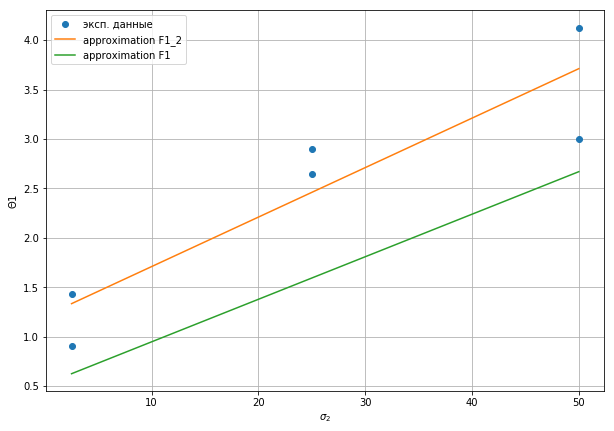

In [99]:
# вычислим точки для построения линии регрессии

x = np.array( [ data.sigma2[0],    data.sigma2[ len(data.sigma2)-1 ] ] )  # используем табличные (эмпирические) иксы, первую и последнюю
y_2 = slope_2*x + b_2
y =   slope  *x + b

figure(figsize=(10,7))
xlabel("$\sigma_2$")
ylabel("$\Theta1$")
grid()

plot(data.sigma2, data['F1_2'],                             'o', label = 'эксп. данные') 
plot(x,y_2, label='approximation F1_2')
plot(x,y,   label='approximation F1')

legend(loc='best')  # легенда графика

TODO: 
- мрамор (формула для $\theta$ через разности: если получается $\theta*$ < 0, то $\theta*$ = 0

- песчанник